In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

df = pd.read_csv('dataset_acoes.csv')

display(df.head(10))

df['Data'] = pd.to_datetime(df['Data'])

# Não tem valor nulo então está tranquilo
print(df.isnull().sum())

,Data,Ticker,Preço_Fechamento,Variação_%,Volume
0,2024-01-01,PETR3,43.71,4.51,1792743
1,2024-01-01,VALE3,63.88,-3.44,1670006
2,2024-01-01,ITUB4,15.23,3.66,1339911
3,2024-01-01,BBDC4,73.73,-4.79,1866891
4,2024-01-01,BBAS3,94.47,-4.99,203355
5,2024-01-01,ABEV3,26.51,-1.96,1407371
6,2024-01-01,MGLU3,12.08,0.25,3630409
7,2024-01-01,WEGE3,14.20,4.74,1600942
8,2024-01-01,B3SA3,51.05,2.85,2054354
9,2024-01-01,RENT3,44.42,4.83,2528388


Data                0
Ticker              0
Preço_Fechamento    0
Variação_%          0
Volume              0
dtype: int64


In [2]:
# VER TODOS OS TICKERS DISPONIVEIS

gp_ticker = pd.DataFrame(df['Ticker'].unique(), columns=['Ticker'])
display(gp_ticker)


,Ticker
0,PETR3
1,VALE3
2,ITUB4
3,BBDC4
4,BBAS3
5,ABEV3
6,MGLU3
7,WEGE3
8,B3SA3
9,RENT3


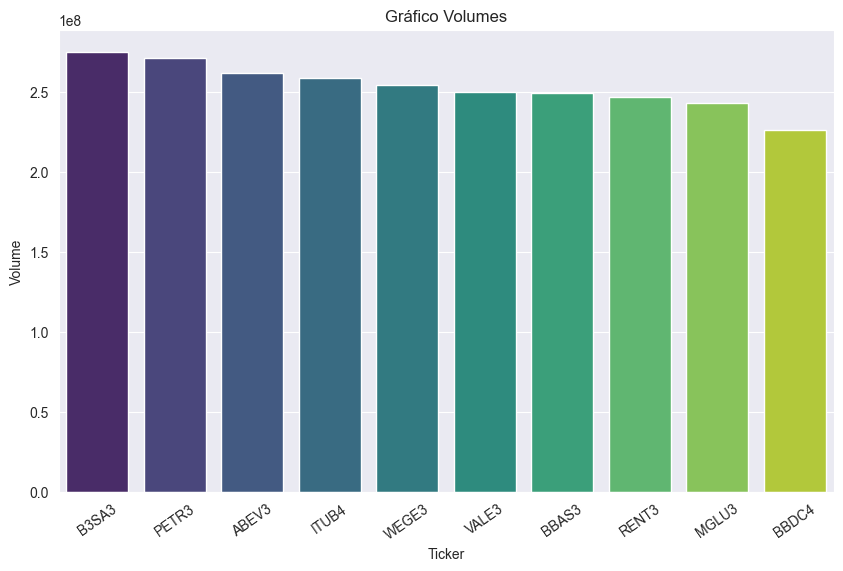

In [3]:
# GRÁFICO DOS VOLUMES, ver qual volume foi o maior

df_cres = df.groupby('Ticker')['Volume'].sum().reset_index().sort_values(by='Volume', ascending=False)

order = df_cres['Ticker']

plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')
sns.barplot(x='Ticker', y='Volume', data=df_cres, palette='viridis', order=order, hue='Ticker')
plt.title('Gráfico Volumes')
plt.xticks(rotation=35)
plt.show()

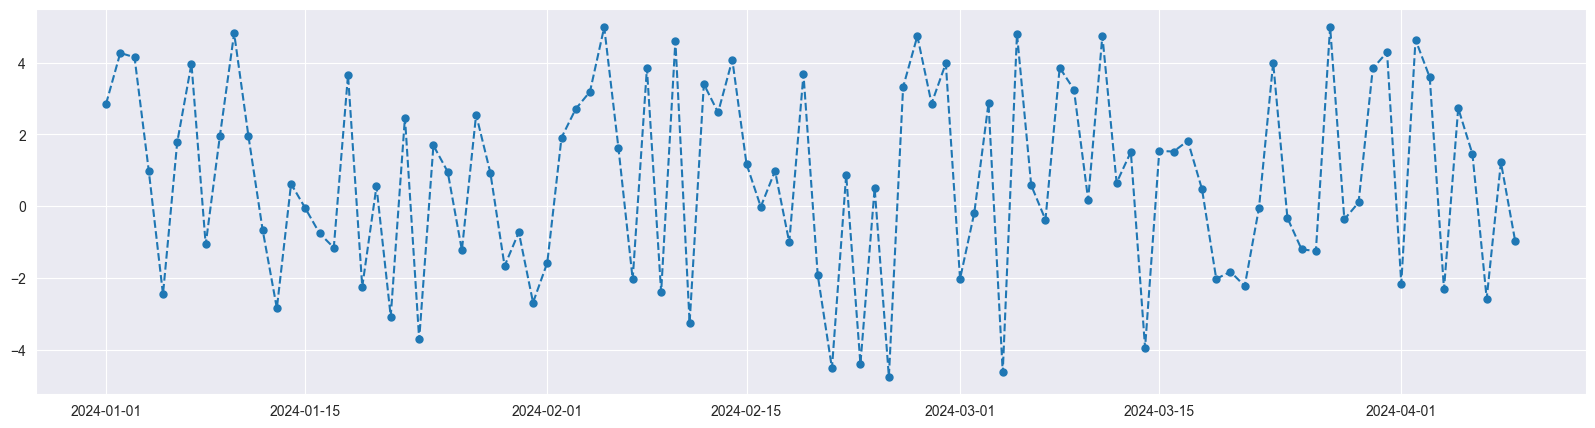

In [4]:
# FILTRANDO B3SA3 DATA VARIAÇÃO

df['Mensal'] = pd.to_datetime(df['Data']).dt.month_name()
filtro = df[df['Ticker'] == 'B3SA3']

# CRIANDO FUNÇÃO PARA VER SE ESTÁ ALTO OU BAIXO
def updown(n):
    if n >= 0.1:
        return 'Up'
    else:
        return 'Down'

df['Step'] = df['Variação_%'].apply(updown)

plt.figure(figsize=(20, 5))
plt.plot(filtro['Data'], filtro['Variação_%'], linestyle="--", marker='o', markersize=5)
plt.show()